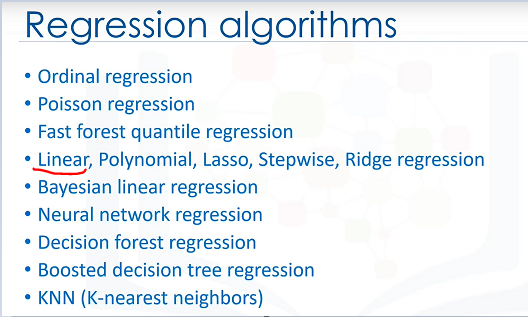

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
pwd

'C:\\Users\\Tetiana'

In [11]:
cd C:\Users\Tetiana\Documents\GitHub\Datasets\FuelConsumption

C:\Users\Tetiana\Documents\GitHub\Datasets\FuelConsumption


In [12]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 602E-BB1D

 Directory of C:\Users\Tetiana\Documents\GitHub\Datasets\FuelConsumption

16.05.2021  18:04    <DIR>          .
16.05.2021  18:04    <DIR>          ..
16.05.2021  18:04    <DIR>          .ipynb_checkpoints
16.05.2021  18:04            72ÿ629 FuelConsumption.csv
16.05.2021  18:04            35ÿ920 FuelConsumptionEDA.ipynb
               2 File(s)        108ÿ549 bytes
               3 Dir(s)  270ÿ616ÿ772ÿ608 bytes free


In [13]:
df = pd.read_csv("FuelConsumption.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [15]:
df.iloc[0]

MODELYEAR                      2014
MAKE                          ACURA
MODEL                           ILX
VEHICLECLASS                COMPACT
ENGINESIZE                        2
CYLINDERS                         4
TRANSMISSION                    AS5
FUELTYPE                          Z
FUELCONSUMPTION_CITY            9.9
FUELCONSUMPTION_HWY             6.7
FUELCONSUMPTION_COMB            8.5
FUELCONSUMPTION_COMB_MPG         33
CO2EMISSIONS                    196
Name: 0, dtype: object

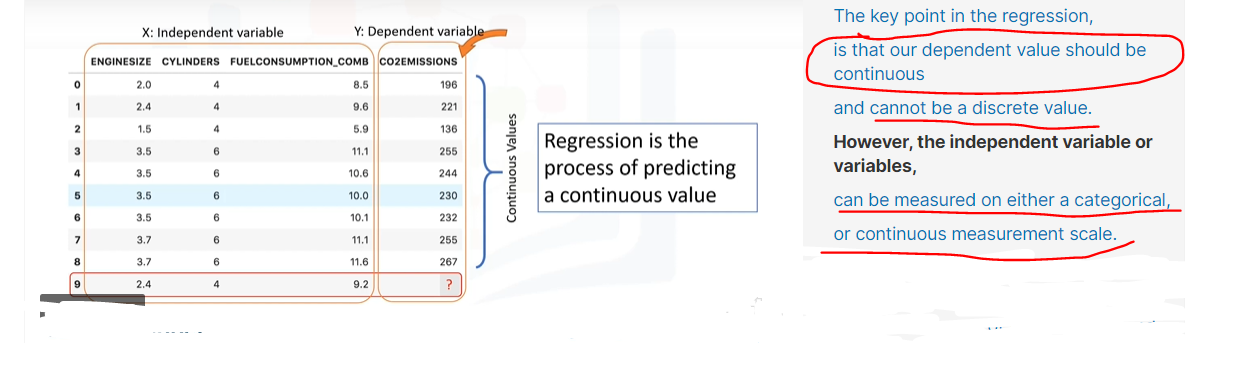

## Lets select some features that we want to use for regression.

In [14]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


### Lets plot Emission values with respect to Engine size:


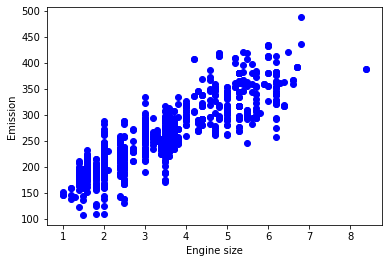

In [16]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

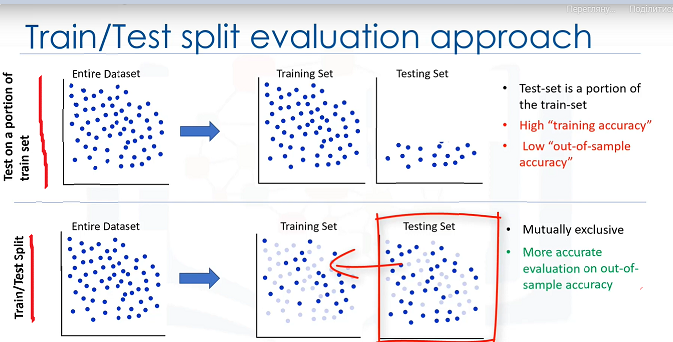

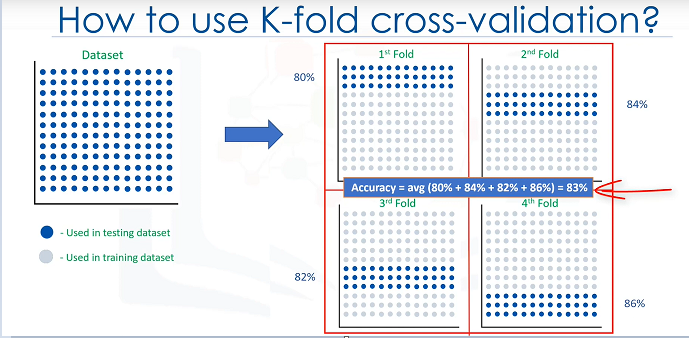

# Use Train test split:

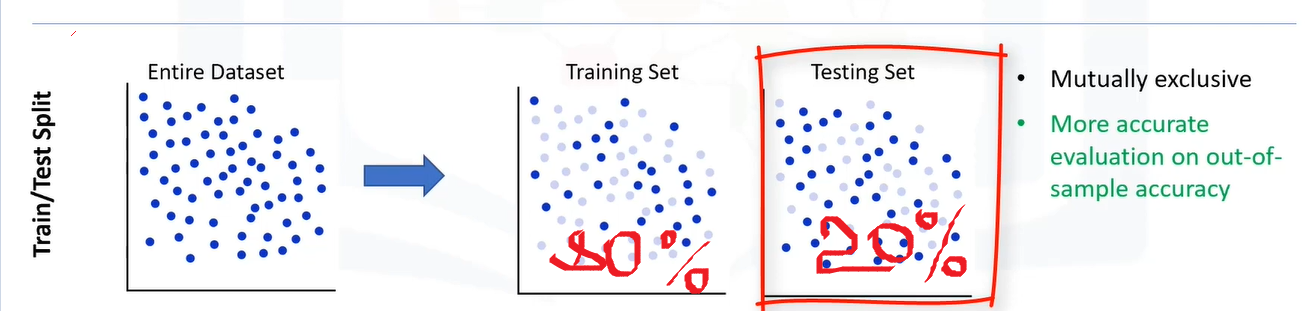

In [21]:
msk = np.random.rand(len(df)) < 0.8
msk

array([ True,  True, False, ...,  True,  True,  True])

In [25]:
train = cdf[msk]
test = cdf[~msk]

len(train),len(test)

(852, 215)

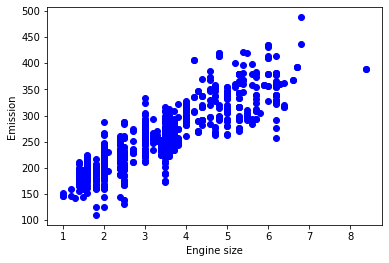

In [23]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h2 id="multiple_regression_model">Multiple Regression Model</h2>

In [27]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [31]:
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

In [35]:
x,y

(array([[ 2. ,  4. ,  8.5],
        [ 2.4,  4. ,  9.6],
        [ 3.5,  6. , 11.1],
        ...,
        [ 3. ,  6. , 11.8],
        [ 3.2,  6. , 11.3],
        [ 3.2,  6. , 12.8]]),
 array([[196],
        [221],
        [255],
        [244],
        [230],
        [232],
        [255],
        [267],
        [212],
        [359],
        [359],
        [338],
        [354],
        [338],
        [354],
        [359],
        [230],
        [214],
        [230],
        [230],
        [214],
        [235],
        [251],
        [224],
        [258],
        [224],
        [258],
        [260],
        [227],
        [258],
        [288],
        [361],
        [230],
        [239],
        [246],
        [304],
        [294],
        [336],
        [407],
        [354],
        [336],
        [407],
        [306],
        [308],
        [290],
        [262],
        [285],
        [262],
        [285],
        [267],
        [281],
        [281],
        [297],
        [209],
       

In [36]:
regr.fit (x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.13225075  6.65839    10.01134569]]


In [38]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_hat

array([[167.5356533 ],
       [216.59892716],
       [248.16799039],
       [202.13468117],
       [219.15396884],
       [250.61094157],
       [206.13921945],
       [367.81033475],
       [343.7831051 ],
       [367.81033475],
       [265.6279601 ],
       [217.15169971],
       [302.09060567],
       [198.1301429 ],
       [239.59846131],
       [237.59619217],
       [245.60526872],
       [289.5242183 ],
       [239.59846131],
       [221.57803907],
       [294.52989114],
       [294.52989114],
       [314.55258252],
       [305.5423714 ],
       [205.13808488],
       [308.54577511],
       [271.30617598],
       [260.29369573],
       [200.58077406],
       [210.14375772],
       [254.28688831],
       [258.29142659],
       [388.6519006 ],
       [351.60992155],
       [273.30844512],
       [315.56907706],
       [353.61219068],
       [193.90142361],
       [185.1153935 ],
       [178.43604305],
       [342.59203044],
       [373.41070105],
       [443.49012088],
       [215

In [39]:
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 666.84
Variance score: 0.84


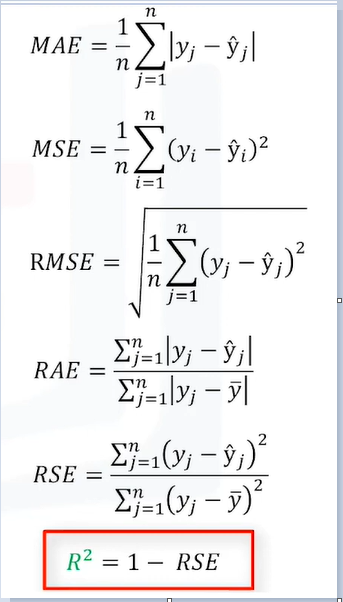

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

In [46]:
num_data = x.shape[0]

mse = mean_squared_error(y,y_hat)
rmse = math.sqrt(mse/num_data)
rse = math.sqrt(mse/(num_data-2))
rsquare=regr.score(x,y)
mae=mean_absolute_error(y,y_hat)

print('RSE=',rse)
print('R-Square=',rsquare)
print('rmse=',rmse)
print('mae=',mae)

RSE= 1.7693842661377523
R-Square= 0.8444827051687372
rmse= 1.761135343514059
mae= 18.86797136717889


In [47]:
pwd

'C:\\Users\\Tetiana\\Documents\\GitHub\\Datasets\\FuelConsumption'